In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import statsmodels.api as sm


/Users/dorkyegg/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


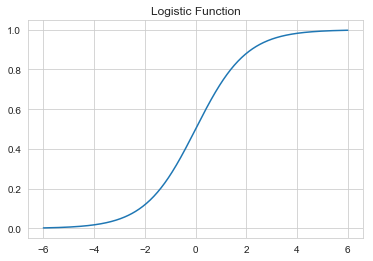

In [3]:
# let's plot the logistic function f(t) = 1 / ( 1 + e**-t)
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t))

# setup array from [-6,6] with 500 points
t = np.linspace(-6,6,500)

# iterate through array to create y values of plot
y = np.array([logistic(ele) for ele in t])

# visualize
plt.plot(t,y)
plt.title('Logistic Function')

In [ ]:
# very useful for making binary decision

In [4]:
# lets get the data and look at the data visually

# this format is specific to statsmodel 
df = sm.datasets.fair.load_pandas().data

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0


In [7]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [8]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [13]:
df.groupby('Had_Affair').mean()
# observations - those with affairs had lower marraiage rating, older, longer marriage, more children, 
# slightly less religious, and slightly less educated

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [12]:
df.groupby('Had_Affair').count()
# observation - roughly 2:1 ratio of no-affair to affair

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4313,4313,4313,4313,4313,4313,4313,4313,4313
1,2053,2053,2053,2053,2053,2053,2053,2053,2053


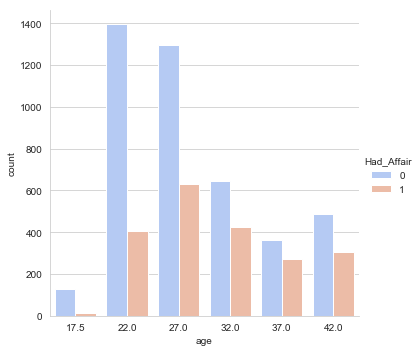

In [16]:
# lets see visually
sns.catplot('age',data=df,hue='Had_Affair',kind='count',palette='coolwarm')

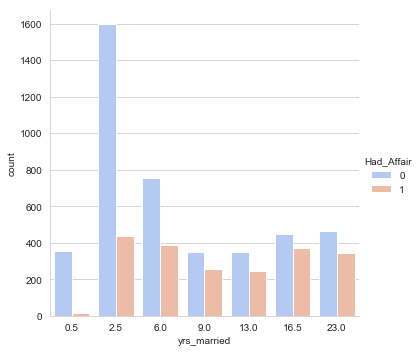

In [18]:
sns.catplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

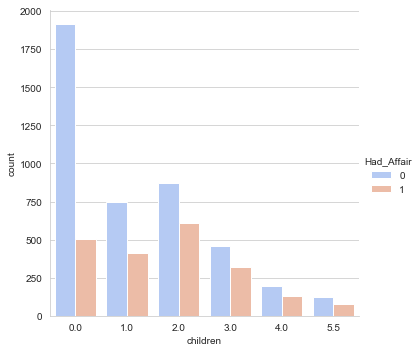

In [19]:
sns.catplot('children',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

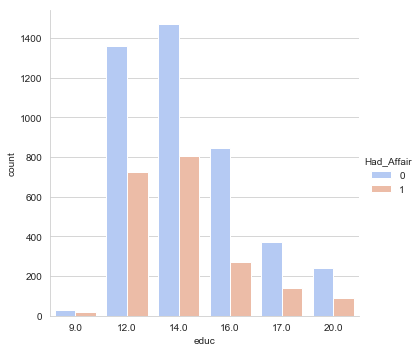

In [20]:
sns.catplot('educ',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

In [23]:
# lets use dummy values for the 2 occupation columns 

# dummy values force the values into set categories instead of a range along a spectrum

occ_dummies = pd.get_dummies(df['occupation'])
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [24]:
occ_husb_dummies = pd.get_dummies(df['occupation_husb'])
occ_husb_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [26]:
# rename the columns to be something more relevant
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
occ_husb_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [33]:
# drop columns that we will replace with dummy values

# also drop Had_Affair since this is our target column

X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [29]:
# the original DataFrame
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [30]:
# new merged DataFrame of occupations (husb and wife) only
dummies = pd.concat([occ_dummies,occ_husb_dummies],axis=1)

In [31]:
# the reduced dataframe ex-occupations and had-affair target
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [32]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [34]:
# remember, axis = 1 to merge along columns
X = pd.concat([X,dummies],axis=1)

# now should be all set with a working DataFrame
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [35]:
# now prep the target variable array
Y = df.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [36]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [37]:
# handling multicollinearity
# recall: when a set of variables are related, you falsely think you can predict with high accuracy
# in this data, occ1 thru occ6 are all related, knowing occ1 thru occ5 gives you prediction on occ6

# solution: drop one of the variables from the dummy set

X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [38]:
# we also need to remove the 'affairs' column which can translate easily into our Had_Affairs target
X = X.drop('affairs',axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [39]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [42]:
# to use in sklearn, we'll need to flatted the Y array
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
log_model = LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)

# observation - 72.5% accuracy rating

0.72588752748978946

In [45]:
# percentage of woman that had affairs
Y.mean()

0.32249450204209867

In [ ]:
# observation - we could have predicted no-affair for all women at 68%, 
#  or slightly higher at 72.5% with attributes considered

In [55]:
# which coeff's were most important?

# 'zip' merges the 2 lists into each column of the DataFrame
# 'list' handles the iteration of each data type, to structure for DataFrame

coeff_df = DataFrame(list(zip(X.columns,np.transpose(log_model.coef_))))

In [57]:
coeff_df

# observation - negative numbers reduce likelihood of affair

,0,1
0,rate_marriage,[-0.697845509654]
1,age,[-0.0563363245639]
2,yrs_married,[0.103892991874]
3,children,[0.0181853214414]
4,religious,[-0.368506640382]
5,educ,[0.00864737414573]
6,occ2,[0.298118886549]
7,occ3,[0.60815029105]
8,occ4,[0.346511268985]
9,occ5,[0.942259551778]


In [58]:
# lets train and test the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [60]:
# check out the shapes of how sklearn has split the data
print('X-train', X_train.shape)
print('X-test', X_test.shape)
print('Y-train', Y_train.shape)
print('Y-test', Y_test.shape)

X-train (4774, 16)
X-test (1592, 16)
Y-train (4774,)
Y-test (1592,)


In [61]:
log_model2 = LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
# create predictions using the test dataset
class_predict = log_model2.predict(X_test)

In [68]:
# using sklearn's accuracy method to compare random Y_test dataset to predicted values from X_test
print(metrics.accuracy_score(Y_test,class_predict))

# observation - 72.5% pretty much same as original model accuracy

0.724874371859
